In [1]:
# Email Spam Classification using KNN and SVM
# Binary Classification: 0 = Not Spam (Normal), 1 = Spam (Abnormal)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("data/emails.csv")

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(f"Total Emails: {len(df)}")
print(f"Features: {df.shape[1] - 2}")  # excluding Email No. and Prediction
print(f"\nClass Distribution:")
print(df['Prediction'].value_counts())
print(f"Not Spam: {(df['Prediction']==0).sum()}")
print(f"Spam: {(df['Prediction']==1).sum()}")

Dataset Shape: (5172, 3002)

First few rows:
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

Dataset Info:
To

In [ ]:
# Prepare data for training
X = df.iloc[:, 1:3001]  # Word frequency features (excluding Email No.)
y = df.iloc[:, -1]      # Prediction column (0 = Not Spam, 1 = Spam)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
xScaled = scaler.fit_transform(X)

pca = PCA(n_components=100, svd_solver='randomized', random_state=42)
xred = pca.fit_transform(xScaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xred, y, test_size=0.20, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 4137
Testing set size: 1035


In [4]:
# ========== K-NEAREST NEIGHBORS (KNN) ==========
print("="*60)
print("K-NEAREST NEIGHBORS (KNN)")
print("="*60)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"\nKNN Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred, target_names=['Not Spam', 'Spam']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

K-NEAREST NEIGHBORS (KNN)

KNN Accuracy: 0.8686 (86.86%)

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.94      0.87      0.90       739
        Spam       0.73      0.86      0.79       296

    accuracy                           0.87      1035
   macro avg       0.83      0.87      0.85      1035
weighted avg       0.88      0.87      0.87      1035

Confusion Matrix:
[[645  94]
 [ 42 254]]


In [5]:
# ========== SUPPORT VECTOR MACHINE (SVM) ==========
print("\n" + "="*60)
print("SUPPORT VECTOR MACHINE (SVM)")
print("="*60)

svm = SVC(C=1.0, kernel='linear', gamma='auto')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"\nSVM Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred, target_names=['Not Spam', 'Spam']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))


SUPPORT VECTOR MACHINE (SVM)

SVM Accuracy: 0.9594 (95.94%)

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.98      0.97      0.97       739
        Spam       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Confusion Matrix:
[[715  24]
 [ 18 278]]


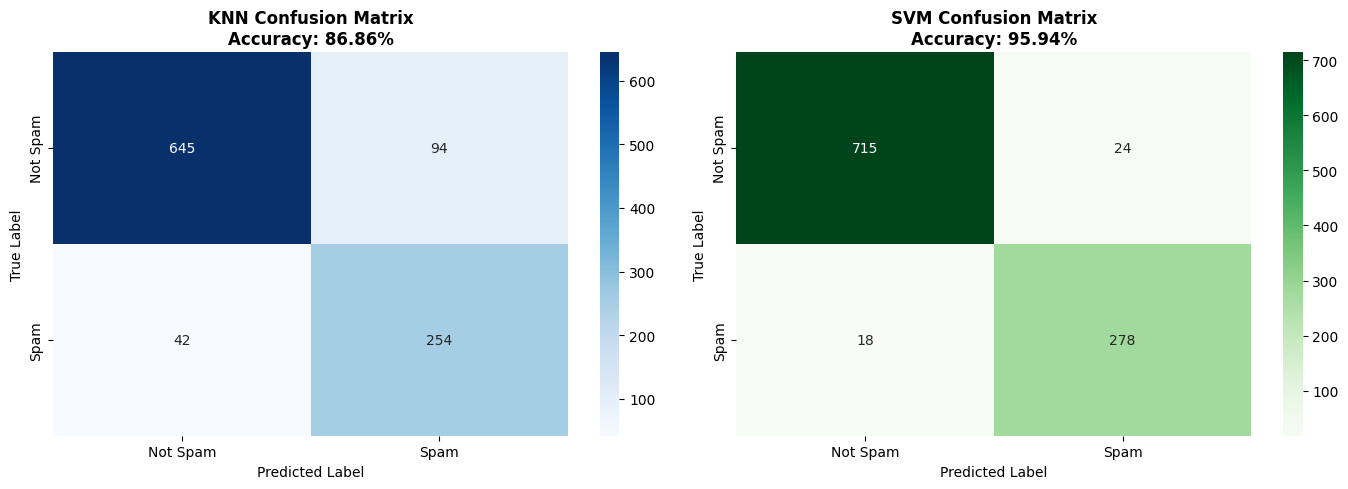

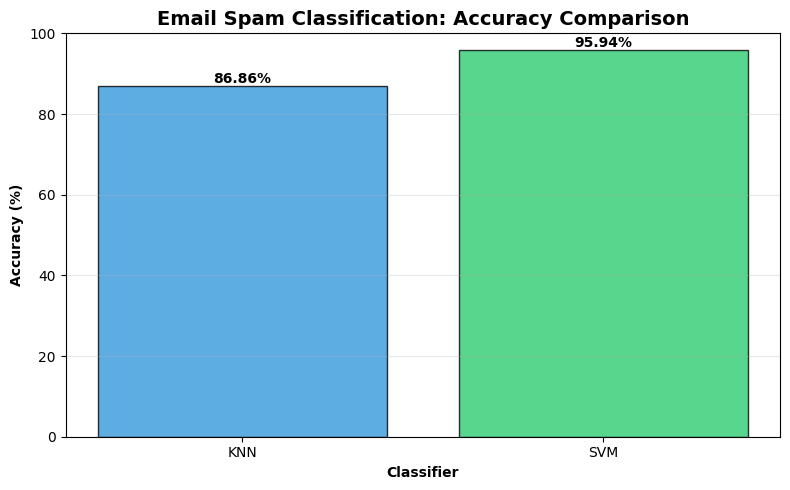

In [6]:
# ========== VISUALIZATION ==========
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title(f'KNN Confusion Matrix\nAccuracy: {knn_accuracy*100:.2f}%', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticklabels(['Not Spam', 'Spam'])
axes[0].set_yticklabels(['Not Spam', 'Spam'])

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=True)
axes[1].set_title(f'SVM Confusion Matrix\nAccuracy: {svm_accuracy*100:.2f}%', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Not Spam', 'Spam'])
axes[1].set_yticklabels(['Not Spam', 'Spam'])

plt.tight_layout()
plt.show()

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
classifiers = ['KNN', 'SVM']
accuracies = [knn_accuracy*100, svm_accuracy*100]
colors = ['#3498db', '#2ecc71']

bars = plt.bar(classifiers, accuracies, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.xlabel('Classifier', fontweight='bold')
plt.title('Email Spam Classification: Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 100])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()